In [1]:
from domoku.board import GomokuBoard
from domoku.minimax import MinimaxSearch
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.policies.maximal_criticality import MaxCriticalityPolicy
from domoku.ddpg import NxNx4Game, Trainer, DdpgPlayer
from domoku import data
from domoku.tools import GomokuTools as gt
from domoku.constants import *

In [2]:
SIZE=15

hard_policy = MaxCriticalityPolicy(SIZE, overconfidence=1)

params = MaxInfluencePolicyParams(
    n=SIZE,
    sigma=.7,
    iota=3,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)

initial_state = data.create_nxnx4(size=15, stones=[('H', 8)])
white = MaxInfluencePolicy(params, pov=WHITE, criticality_model=hard_policy)
black = MaxInfluencePolicy(params, pov=BLACK, criticality_model=hard_policy)

2022-05-21 16:31:53.292910: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [36]:
NUM_TRAJECTORIES = 20
trainer = Trainer(SIZE, white)

# if terminal is set to True, some of the trajectories may be None
trajectories = trainer.create_trajectories(num_trajectories=NUM_TRAJECTORIES, max_length=80,
                                           initial_state=initial_state, terminal=True)


/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [40]:
with open("heuristics.gmk", 'w') as f:
    for i in range(NUM_TRAJECTORIES):
        trajectory = trajectories[i]
        if trajectory is not None:
            stones = [gt.m2b(step[0], 15) for step in trajectory[1:]]
            stones = gt.stones_to_string(stones)
            print("h8" + stones, file=f)

In [30]:
stones = 'h8' + stones

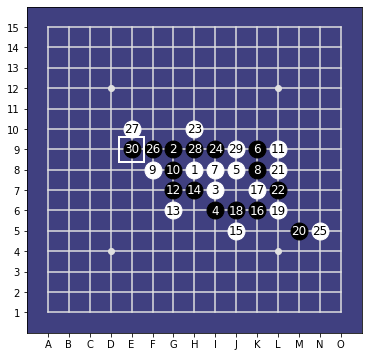

In [34]:
GomokuBoard(15, disp_width=6, stones=gt.string_to_stones(stones)).display()

In [32]:
all_stones_t = [data.transform(gt.string_to_stones(stones), 15, rot, ref)
                for rot in range(4)
                for ref in [False, True]]

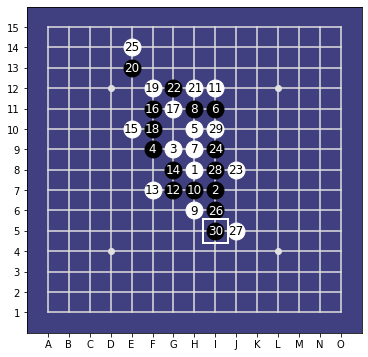

In [35]:
GomokuBoard(15, disp_width=6, stones=all_stones_t[3]).display()